# Import libraries

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import nltk.corpus
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 

# Libraries for text preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
pd.set_option("display.max_rows", None, "display.max_columns", None)


[nltk_data] Downloading package punkt to /Users/rooma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rooma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/rooma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Set path

In [8]:
#Change path to your local repository , where train data , category data is stored
traindatapath = "/Users/rooma/Desktop/Times Automated Multi label classifiction/Train_data.csv"
rootpath = "/Users/rooma/Desktop/Times Automated Multi label classifiction/"

# Import data

In [6]:

col_names = ["title", "link", "description","long_description","id", "Col1"] # for some rows there is data in 6th columns , hence taken Col1 as additional column
data_raw = pd.read_csv(traindatapath,sep='|', names=col_names)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 1411104
Number of columns in data = 6


**Sample data:**


,title,link,description,long_description,id,Col1
0,title,link,description,long_description,id,NaN
1,ପ୍ରବଳ ଶୀତରେ ଥରୁଛି ସାରା ଓଡ଼ିଶା । ୧୩ଟି ଜିଲ୍ଲା ପାଇ...,https://www.newspointapp.com/odia-news/publish...,କନକ ବ୍ୟୁରୋ : ଜାଡରେ ଥରୁଛି ସାରା ଓଡିଶା । ସ୍ୱାଭାବି...,କନକ ବ୍ୟୁରୋ : ଜାଡରେ ଥରୁଛି ସାରା ଓଡିଶା । ସ୍ୱାଭାବି...,2674,NaN
2,'संघर्षशील और जुझारू संस्कृतिकर्मी थे संदीपन व...,https://navbharattimes.indiatimes.com/metro/lu...,\Bसंदीपन ने कलाकारों को दिशा देने के साथ नाट्य...,B Sandipan awakened the play with consciousnes...,3874,NaN
3,डीपी रामभरोसे,https://maharashtratimes.indiatimes.com/citize...,NaN,NaN,425,NaN
4,Whipping up nationalism has a shelf life: Kama...,https://www.newspointapp.com/english-news/publ...,BHOPAL: The widespread protests against CAA ar...,BHOPAL: The widespread protests against CAA ar...,5177,NaN


# Data exploration and preprocessing

In [4]:
data_raw.describe()

,title,link,description,long_description,id,Col1
count,1411104,1411104,1353326,1294279,1411052,2219
unique,770109,1241353,839859,868771,1410373,2152
top,Redirecting,https://timesofindia.indiatimes.com/india/time...,टेलीग्राम पर हमें फॉलो करें ! रोज पाएं मनोरंजन...,Follow us on Telegram! Get 10 - 12 important u...,"India News""","1-year target: Rs 1,920 12 Feb, 2020 PI Indus..."
freq,805,31,1309,1195,9,6


In [15]:
#Fetch wordcount for each abstract in description
data_raw['word_count'] = data_raw['description'].apply(lambda x: len(str(x).split(" ")))
data_raw[['description','word_count']].head(100)

,description,word_count
0,description,1
1,କନକ ବ୍ୟୁରୋ : ଜାଡରେ ଥରୁଛି ସାରା ଓଡିଶା । ସ୍ୱାଭାବି...,36
2,\Bसंदीपन ने कलाकारों को दिशा देने के साथ नाट्य...,27
3,NaN,1
4,BHOPAL: The widespread protests against CAA ar...,34
5,சமாஜ்வாதி கட்சியின் நிறுவனத் தலைவர் முலாயம் சி...,21
6,பேட்டரி சக்தியில் இயங்கும் வாகன உற்பத்தியை ஊக்...,22
7,మరో మూడు రోజుల్లో పాన్‌కార్డు రద్దు కాబోతోంది....,26
8,Here's Presenting popular Children Nursery Sto...,29
9,Norwich City v Tottenham Hotspur - Premier Lea...,36


In [11]:
#Fetch wordcount for each abstract in long description
data_raw['word_count1'] = data_raw['long_description'].apply(lambda x: len(str(x).split(" ")))
data_raw[['long_description','word_count1']].head(20)

,long_description,word_count1
0,long_description,1
1,କନକ ବ୍ୟୁରୋ : ଜାଡରେ ଥରୁଛି ସାରା ଓଡିଶା । ସ୍ୱାଭାବିକ ଠାରୁ ୬ଡିଗ୍ରୀ ଖସିଆସିଛି ପାରଦ । ଆହୁରି ଦୁଇ ଦିନ ଅତି ପ୍ରବଳ ଥଣ୍ଡା ଅନୁଭୂତ ହେବ । ଏଥିପାଇଁ ଅଧି ଓଡିଶାରେ ୟେଲୋ ୱାର୍ଣ୍ଣିଂ ଜାରି ହୋଇଛି । ୧୩ଟି ଜିଲ୍ଲାରେ ଜିଲ୍ଲା ପ୍ରଶାସନକୁ ସ...,36
2,"B Sandipan awakened the play with consciousness giving direction to the artists. This was said by senior painter and actor Rakesh Pandey, Mathura color worker and Braj-speaking ...",28
3,NaN,1
4,"BHOPAL: The widespread protests against CAA are proof that Indian voters, especially the youth, will not be taken for a ride any longer, believes Madhya Pradesh chief minister Kamal Nath . In an exclusive interview to TOI on completion of a year of his government, Nath accused the BJP-led Centre of bringing up CAA and NRC to divert the youth’s attention from the economic crisis gripping the country. “We have an economy in distress. The government, instead of addressing economic crisis, has sh...",83
5,Samajwadi Party founder Mulayam Singh has been admitted to a private hospital in Mumbai due to a stomach problem. Samajwadi Party founder Mulayam Singh (80) was abruptly ...,28
6,The Union Minister of State for the establishment of a new Technology Center in Chennai to promote battery-powered vehicle manufacturing. The use of vehicles to suit the population of the country ...,32
7,"PANCARD is to be canceled within three days. Don't be surprised. If you do not link a PAN card with Aadhaar, the PAN card is canceled. They have only 3 days to expire ...",34
8,"Here's Presenting popular Children Nursery Story 'Krishna And Kaliya | Sri Krishna'. For popular children Stories, kids songs, children songs, children poems, baby songs, baby rhymes, kids nursery rhymes, nursery poems in Tamil visit Etimes Tamil kids sections. Check out Etimes Kids videos section for more Kids Nursery rhymes, Baby songs and Kids poems.",54
9,"Norwich City v Tottenham Hotspur - Premier League Hello and welcome to the EPL transfer news roundup for the day! Here are the top stories of the day surrounding the ! Erling Braut Haaland joins Dortmund Borussia Dortmund have confirmed the signing of Erling Braut Haaland from Red Bull Salzburg. The youngster was linked with a move to Manchester United but he chose to join the German outfit instead. Upon joining the Ruhr outfit, Haaland thanked Salzburg for all that he learned with the Austri...",85


In [16]:
##Descriptive statistics of word counts
data_raw.word_count.describe()

count    1.411104e+06
mean     2.916205e+01
std      9.921985e+00
min      1.000000e+00
25%      2.400000e+01
50%      3.100000e+01
75%      3.500000e+01
max      4.139000e+03
Name: word_count, dtype: float64

In [14]:
##Descriptive statistics of word counts
data_raw.word_count1.describe()

#For purpose of POC we will continue with description column as processing on long_description will take time in processing

count    1.411104e+06
mean     7.929328e+01
std      1.587759e+02
min      1.000000e+00
25%      2.700000e+01
50%      3.400000e+01
75%      4.400000e+01
max      1.328900e+04
Name: word_count1, dtype: float64

In [137]:
#Identify common words
freq = pd.Series(' '.join(English['description']).split()).value_counts()[:30]
freq



the      590806
of       325068
to       280898
in       278948
a        244880
and      227101
on       210946
The      137513
for      122675
is       120171
has      102052
with      80542
that      70550
at        70517
by        66685
from      61610
as        61131
...       59388
was       57322
his       49256
will      48662
be        43308
have      42148
are       41758
an        39386
India     37227
said      35915
her       34427
|         34085
been      32537
dtype: int64

In [135]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(English 
         ['description']).split()).value_counts()[-20:]
freq1

make-up!           1
banters.           1
instin...          1
464-run            1
SOLAPUR...         1
অসুস্থ             1
Born’              1
corpu...           1
A-Listers          1
19:46...           1
culture\".         1
Invictus,          1
764.4              1
Soonawalla         1
Lutho              1
Variyawala         1
\"Oh,              1
Kalupur.           1
Retail-focussed    1
Sudhan             1
dtype: int64

In [23]:
data_raw.isna().any()

title               False
link                False
description          True
long_description     True
id                   True
Col1                 True
dtype: bool

In [5]:
data_raw.isnull().values.any()

False

In [14]:
data_raw.isnull().sum()

title                     0
link                      0
description           57778
long_description     116825
id                       52
Col1                1408885
dtype: int64

In [4]:
data_raw.fillna("",inplace=True)

In [ ]:
#Identify common words
freq = pd.Series(' '.join(data_raw['long_description']).split()).value_counts()[:20]
freq


In [ ]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data_raw 
         ['long_description']).split()).value_counts()[-20:]
freq1

In [9]:
# Import categories data
categories = pd.read_csv(rootpath +"cat_levels.csv")
print("Number of rows in data =",categories.shape[0])
print("Number of columns in data =",categories.shape[1])
print("\n")
print("**Sample data:**")
categories

Number of rows in data = 162
Number of columns in data = 2


**Sample data:**


,level1_categories,level_2_categories
0,Info Tech,Info Tech
1,Travel & Tourism,PaaS
2,Travel,Products
3,Vehicles & Parts,SaaS
4,Automobiles,Travel & Tourism
5,Shopping,Air Travel
6,Banking & Finance,Holiday Packages
7,Others,Hotel
8,Career & Job,Tourism
9,Entertainment,Travel Booking Services


In [16]:
categories.describe()


,level1_categories,level_2_categories
count,32,162
unique,32,162
top,Impression,Telecom
freq,1,1


In [17]:
# Lots of missing data in level 1 category
categories.isnull().sum()

level1_categories     130
level_2_categories      0
dtype: int64

In [18]:
categories.isna().any()

level1_categories      True
level_2_categories    False
dtype: bool

# Check Language distribution in given data for description col

In [ ]:
from langdetect import detect 
import sys

# Add a new column named 'language' 
for i in range(0, data_raw.size):
    try:
        data_raw.loc[i,"language"]= detect(data_raw.loc[i,"description"])
    except:
        if(pd.isna(data_raw.loc[i,"description"])):
            data_raw.loc[i,"language"] = "None" #handle nan values in descrption
        else:
            print(data_raw.loc[i,"description"])
            data_raw.loc[i,"language"] = "or" #Since langdetect not able to identify odia lang handled exception this way

In [ ]:
data_raw[data_raw['language']=='mr']

In [94]:
# Check how many unique languages are there
data_raw['language'].unique()

array(['fr', 'ne', 'hi', 'None', 'en', 'ta', 'te', 'ml', 'kn', 'bn', 'pa',
       'mr', 'gu', 'ur', 'or', 'id', 'sv', 'nl', 'de', 'so', 'ca', 'tl',
       'et', 'tr', 'lv', 'it', 'af', 'cy', 'no', 'ro', 'fi', 'da', 'es',
       'sw', 'sq', 'vi', 'pt', 'sl', 'hr'], dtype=object)

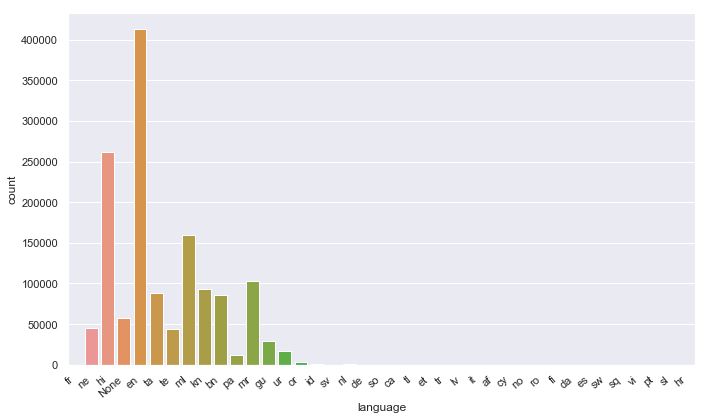

In [107]:
#create count plot for languages
%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.countplot(x='language',  data=data_raw)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Above count plot shows we have max records for english language , followed by Hindi , Malyalum , marathi , tamil and other idian languages

# Store data in files by language

In [11]:
data_raw[data_raw['language']=='en'].to_csv(rootpath +'English.csv')


In [96]:
data_raw[data_raw['language']=='hi'].to_csv(rootpath +'hindi.csv')


In [97]:
data_raw[data_raw['language']=='fr'].to_csv(rootpath +'fr.csv')


In [98]:
data_raw[data_raw['language']=='ne'].to_csv(rootpath +'ne.csv')


In [99]:
data_raw[data_raw['language']=='None'].to_csv(rootpath +'None.csv')


In [100]:
data_raw[data_raw['language']=='ta'].to_csv(rootpath +'ta.csv')


In [101]:
data_raw[data_raw['language']=='te'].to_csv(rootpath +'te.csv')


In [102]:
data_raw[data_raw['language']=='ml'].to_csv(rootpath +'ml.csv')


In [103]:
data_raw[data_raw['language']=='kn'].to_csv(rootpath +'kn.csv')


In [104]:
data_raw[data_raw['language']=='bn'].to_csv(rootpath +'bn.csv')


In [105]:
data_raw[data_raw['language']=='pa'].to_csv(rootpath +'pa.csv')


In [108]:
data_raw[data_raw['language']=='mr'].to_csv(rootpath +'mr.csv')


In [109]:
data_raw[data_raw['language']=='gu'].to_csv(rootpath +'gu.csv')


In [110]:
data_raw[data_raw['language']=='ur'].to_csv(rootpath +'ur.csv')


In [111]:
data_raw[data_raw['language']=='or'].to_csv(rootpath +'or.csv')


In [112]:
# All languages with less data in 1 file
language = ['id', 'sv', 'nl', 'de', 'so', 'ca', 'tl',
       'et', 'tr', 'lv', 'it', 'af', 'cy', 'no', 'ro', 'fi', 'da', 'es',
       'sw', 'sq', 'vi', 'pt', 'sl', 'hr'] 
data_raw[data_raw.language.isin(language)].to_csv(rootpath +'multiple.csv')




# Proceed with keyword extraction of records in english language

In [17]:
English = pd.read_csv(rootpath + 'English.csv')
English.shape
#English.head()

(412607, 8)

In [ ]:
English.head()

In [68]:
English.isnull().sum()

Unnamed: 0          0
title               0
link                0
description         0
long_description    0
id                  0
Col1                0
language            0
dtype: int64

In [67]:
English.fillna("",inplace=True)

In [18]:


##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
new_stopwords = ["said","th","one","two","wednesday","tuesday","thursday","friday","monday"]
stop_words.update(new_stopwords)
new_stopwords_list = set(stop_words)

corpus = []
length = len(English) - 1
print
for i in range(0, length):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', English['description'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
 
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append([English['id'][i] , text])

In [26]:
corpus

[['5177',
  'bhopal widespread protest caa proof indian voter especially youth taken ride longer belief madhya pradesh chief minister kamal nath exclu'],
 ['2882',
  'presenting popular child nursery story krishna kaliya sri krishna popular child story kid song child song child poem baby song baby rhyme kid nursery rhy'],
 ['2675',
  'norwich city v tottenham hotspur premier league hello welcome epl transfer news roundup day top story day surrounding erling braut haaland join dortm'],
 ['2676',
  'business news news politics nation winter chill grip north india winter chill grip north india et online agency dec ist dal lake begin freeze kashmir woke u'],
 ['3875',
  'bollywood fraternity expressed pain shock news tv actor kushal punjabi untimely death kushal committed suicide home mumbai bandra area late night'],
 ['0',
  'draw end leaf u far question answer answer question may become clearer year likely determine india near term futur'],
 ['1262',
  'flipboard family finance prabhakar

In [4]:
corpus=pd.DataFrame(corpus,columns =["id","text"])
corpus.head()

,id,text
0,5177,bhopal widespread protest caa proof indian vot...
1,2882,presenting popular child nursery story krishna...
2,2675,norwich city v tottenham hotspur premier leagu...
3,2676,business news news politics nation winter chil...
4,3875,bollywood fraternity expressed pain shock news...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus["text"])

In [6]:
list(cv.vocabulary_.keys())[:20]

['bhopal',
 'widespread',
 'protest',
 'caa',
 'proof',
 'indian',
 'voter',
 'especially',
 'youth',
 'taken',
 'ride',
 'longer',
 'belief',
 'madhya',
 'pradesh',
 'chief',
 'minister',
 'kamal',
 'nath',
 'protest caa']

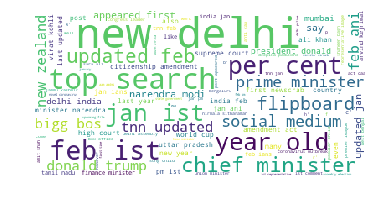

In [19]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'new'),
 Text(0, 0, 'delhi'),
 Text(0, 0, 'india'),
 Text(0, 0, 'year'),
 Text(0, 0, 'minister'),
 Text(0, 0, 'first'),
 Text(0, 0, 'feb'),
 Text(0, 0, 'day'),
 Text(0, 0, 'ist'),
 Text(0, 0, 'jan'),
 Text(0, 0, 'indian'),
 Text(0, 0, 'top'),
 Text(0, 0, 'film'),
 Text(0, 0, 'government'),
 Text(0, 0, 'time'),
 Text(0, 0, 'state'),
 Text(0, 0, 'police'),
 Text(0, 0, 'mumbai'),
 Text(0, 0, 'last'),
 Text(0, 0, 'updated'),
 Text(0, 0, 'chief'),
 Text(0, 0, 'world'),
 Text(0, 0, 'people'),
 Text(0, 0, 'search'),
 Text(0, 0, 'actress'),
 Text(0, 0, 'court'),
 Text(0, 0, 'company'),
 Text(0, 0, 'flipboard'),
 Text(0, 0, 'woman'),
 Text(0, 0, 'song'),
 Text(0, 0, 'actor'),
 Text(0, 0, 'set'),
 Text(0, 0, 'per'),
 Text(0, 0, 'president'),
 Text(0, 0, 'also'),
 Text(0, 0, 'party'),
 Text(0, 0, 'tnn'),
 Text(0, 0, 'old'),
 Text(0, 0, 'khan'),
 Text(0, 0, 'case')]

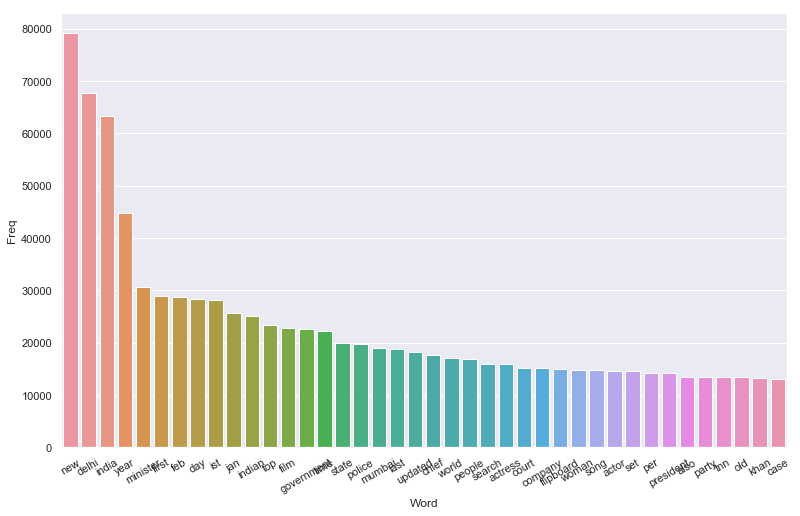

In [32]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=40)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

             Bi-gram   Freq
0          new delhi  43104
1         top search  15014
2            feb ist  12370
3           year old  10860
4            jan ist  10653
5           per cent   9979
6     chief minister   9425
7        updated feb   8966
8      social medium   7210
9        updated jan   6628
10    prime minister   6588
11      donald trump   6534
12       tnn updated   6486
13       new zealand   6253
14          bigg bos   6242
15           feb ani   6195
16    appeared first   6125
17     narendra modi   5468
18  president donald   5050
19       delhi india   5014


[Text(0, 0, 'new delhi'),
 Text(0, 0, 'top search'),
 Text(0, 0, 'feb ist'),
 Text(0, 0, 'year old'),
 Text(0, 0, 'jan ist'),
 Text(0, 0, 'per cent'),
 Text(0, 0, 'chief minister'),
 Text(0, 0, 'updated feb'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'updated jan'),
 Text(0, 0, 'prime minister'),
 Text(0, 0, 'donald trump'),
 Text(0, 0, 'tnn updated'),
 Text(0, 0, 'new zealand'),
 Text(0, 0, 'bigg bos'),
 Text(0, 0, 'feb ani'),
 Text(0, 0, 'appeared first'),
 Text(0, 0, 'narendra modi'),
 Text(0, 0, 'president donald'),
 Text(0, 0, 'delhi india')]

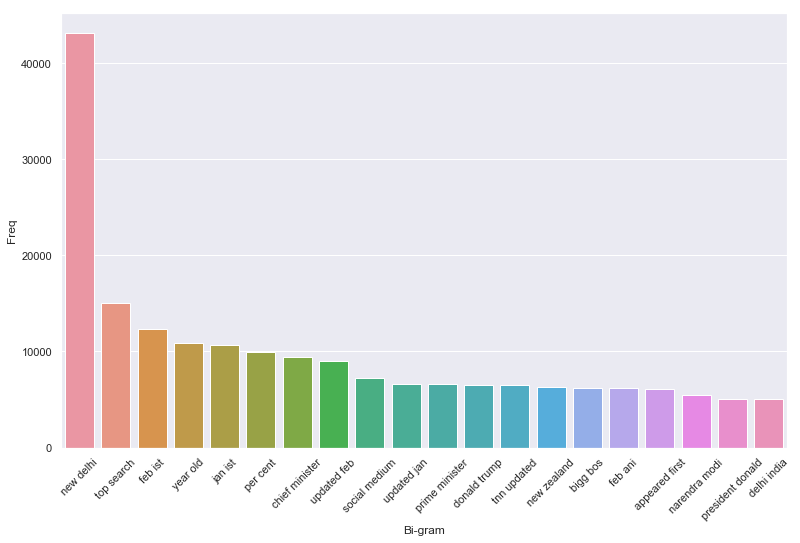

In [24]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

# Train model

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()



In [8]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return listToString(feature_vals)

def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += " " + ele   
    
    # return string   
    return str1  
        


# Result dataset with keywords and id

In [9]:
length = len(corpus) - 1
for i in range(0, length):
    
    doc=corpus['text'][i]
    doc = [doc]
   
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform(doc))
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 5
    keywords=extract_topn_from_vector(feature_names,sorted_items,5)
    corpus.loc[i,"Keywords"]= keywords

corpus.to_csv(rootpath +'ResultSubmission.csv')

   

In [ ]:
pd.set_option('display.max_colwidth', None)
corpus.style.set_properties(subset=['id'], **{'width-min': '100px'})
corpus.style.set_properties(subset=['text'], **{'width-min': '500px'})

corpus.head(100)